# Homework 2

## Load data

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
import numpy as np
import seaborn as sns

In [5]:
%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

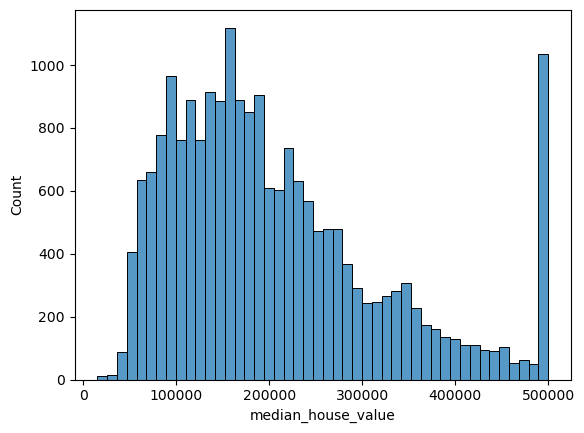

In [6]:
sns.histplot(data.median_house_value)

## Filtering Data

In [7]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
subset_data = data[(data.ocean_proximity == "<1H OCEAN") | (data.ocean_proximity == "INLAND")][
    ['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value']
]

In [9]:
subset_data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [10]:
subset_data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [11]:
subset_data.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Splitting Data

In [12]:
n = len(subset_data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
idx = np.arange(n)

In [14]:
np.random.seed(42)
np.random.shuffle(idx)

In [15]:
data_train = subset_data.iloc[idx[:n_train]]
data_val = subset_data.iloc[idx[n_train:n_train+n_val]]
data_test = subset_data.iloc[idx[n_train+n_val:]]

In [16]:
df_train = data_train.reset_index(drop=True)
df_val = data_val.reset_index(drop=True)
df_test = data_test.reset_index(drop=True)

In [17]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [18]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306


## Linear regression model without regularization

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)    
    return w[0], w[1:]

In [21]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [22]:
def prediction(w0,w,X):
    return w0 + X.dot(w)

In [23]:
cols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

def prepare_X(df, fillna_value):
    df = df.copy()
    df_num = df[cols]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

### Using 0

In [24]:
X_train_zero = prepare_X(df_train, 0)
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

y_train_zero = prediction(w0_zero,w_zero,X_train_zero)
round(rmse(y_train, y_train_zero),2)

0.34

### Using mean

In [25]:
mean =df_train['total_bedrooms'].mean()
X_train_mean = prepare_X(df_train, mean)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

y_train_mean = prediction(w0_zero,w_zero,X_train_mean)
round(rmse(y_train, y_train_mean),2)

0.34

## Linear regression model with regularization

In [26]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [27]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0,w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = prediction(w0,w,X_val)
    score = rmse(y_val, y_pred)
    print(r, w0, round(score,2))


0 -9.763249476058705 0.34
1e-06 -9.763228828919726 0.34
0.0001 -9.76118523373268 0.34
0.001 -9.742646248117506 0.34
0.01 -9.561056191726149 0.34
0.1 -8.058889768400489 0.34
1 -3.133154278040861 0.34
5 -0.841086797335703 0.35
10 -0.4381172315389843 0.35


## Multiple seeds

In [28]:
def split_df(df, seed):

    df = df.copy()
    np.random.seed(seed)

    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [29]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train,df_val,df_test,y_train,y_val,y_test = split_df(subset_data, seed)
    X_train = prepare_X(df_train, 0)
    w0,w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = prediction(w0,w,X_val)
    score = rmse(y_val, y_pred)
    scores.append(score)
    print(seed, w0, round(score,2))

0 -9.87006896973093 0.34
1 -9.114011208585831 0.34
2 -9.91156020047812 0.34
3 -10.233183681051269 0.33
4 -9.174763450203077 0.34
5 -10.006648302137823 0.34
6 -10.03990309729188 0.34
7 -10.353545444955426 0.35
8 -9.899416167338813 0.35
9 -9.964622124602256 0.33


In [30]:
scores_std = round(np.std(np.array(scores)),3)
scores_std

0.005

## combine sets

In [31]:
df_train,df_val,df_test,y_train,y_val,y_test = split_df(subset_data, 9)

df_train_val = pd.concat([df_train, df_val])
df_train_val = df_train_val.reset_index(drop=True)
y_train_val = np.concatenate([y_train, y_val])

X_train_val = prepare_X(df_train_val, 0)
w0,w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

X_test = prepare_X(df_test, 0)
y_test_pred = prediction(w0,w,X_test)
round(rmse(y_test, y_test_pred),2)

0.33